In [1]:
import impute as imp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calplot 
import datetime 
from pickle import dump,load
from tensorflow.keras.models import load_model

## Incomplete data with solar angles added imported without date index

In [87]:
path_archivo='../../01_weather_data/03_imputing_process/01_test_data/'
nombre_archivo='tmx_incomplete_s14Nov_solar_angles.csv'
path_archivo2='../../01_weather_data/03_imputing_process/02_imputed_data/' #este path para donde quieres exportar los datos imputados
nombre_archivo2='tmx_CNN-LSTM_imputed_s15Nov.csv'
tmx_inc=pd.read_csv(path_archivo+nombre_archivo,parse_dates=True,)
tmx_inc

,time,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
0,2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
1,2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2,2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
3,2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
4,2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...,...
52555,2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
52556,2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
52557,2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817
52558,2018-12-31 23:40:00,0.0,0.0,17.99,47.85,87470.02,1.528,358.8,-75.506650,160.527038


# Identify the ubication of the datavoids (date, location and length)

In [88]:
isteps,datavoids,idates=imp.void_identifier(tmx_inc,'Ig')

new_void_at: 2018-01-30 07:20:00
at index 4220
67
new_void_at: 2018-03-08 07:00:00
at index 9546
71
new_void_at: 2018-06-15 06:10:00
at index 23797
79
new_void_at: 2018-06-27 06:10:00
at index 25525
79
new_void_at: 2018-07-09 06:10:00
at index 27253
79
new_void_at: 2018-08-12 06:30:00
at index 32151
76
new_void_at: 2018-11-15 06:50:00
at index 45833


In [89]:
idates

['2018-01-30 07:20:00',
 '2018-03-08 07:00:00',
 '2018-06-15 06:10:00',
 '2018-06-27 06:10:00',
 '2018-07-09 06:10:00',
 '2018-08-12 06:30:00',
 '2018-11-15 06:50:00']

#### Data voids location

In [69]:
isteps

[4220, 9546, 23797, 25525, 27253, 32151, 45689]

#### Data voids length

In [70]:
datavoids

[67, 71, 79, 79, 79, 76, 67]

In [71]:
tmx_inc

,time,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
0,2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
1,2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2,2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
3,2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
4,2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...,...
52555,2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
52556,2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
52557,2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817
52558,2018-12-31 23:40:00,0.0,0.0,17.99,47.85,87470.02,1.528,358.8,-75.506650,160.527038


### Verifico que s'i hay un vac'io de datos

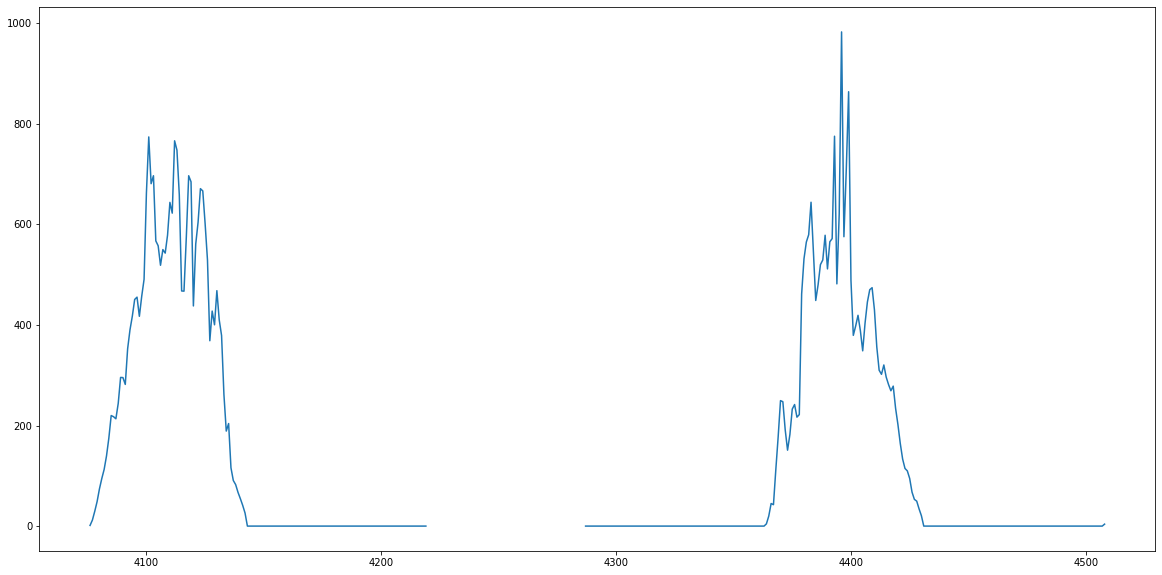

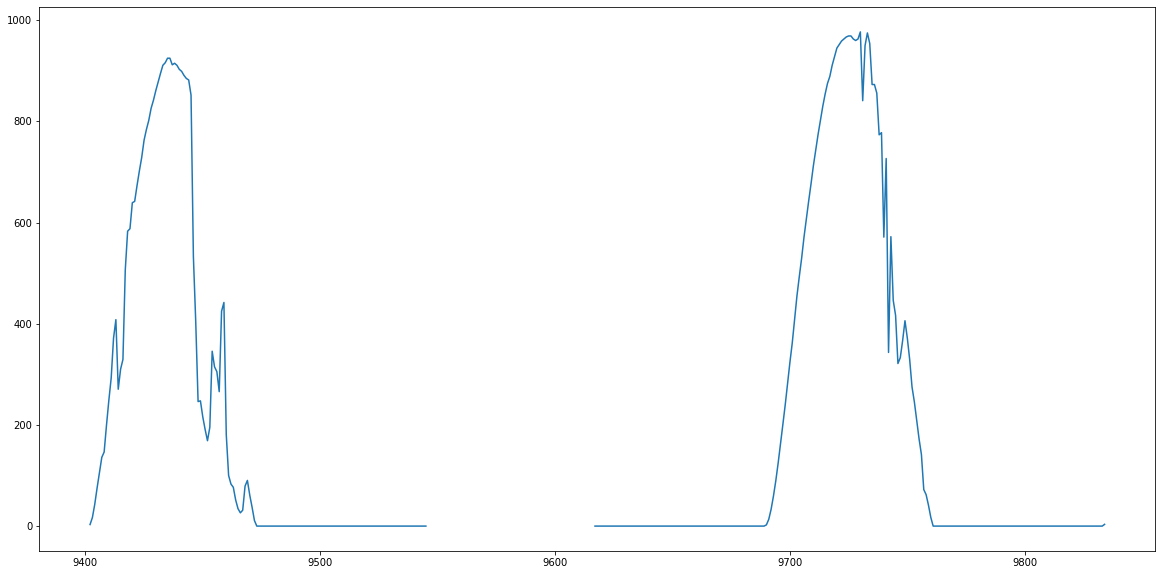

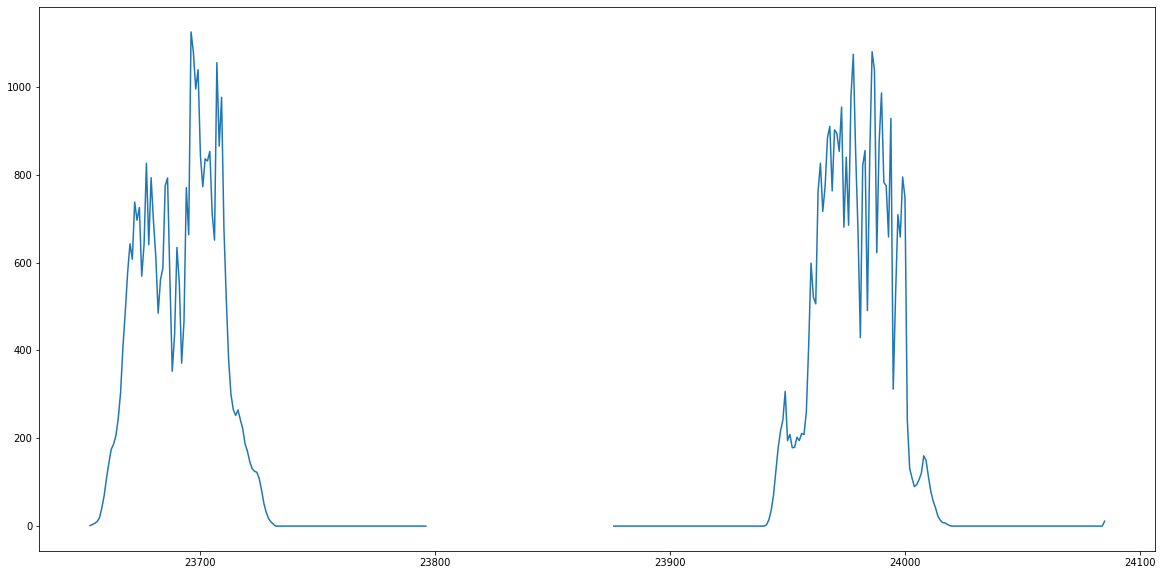

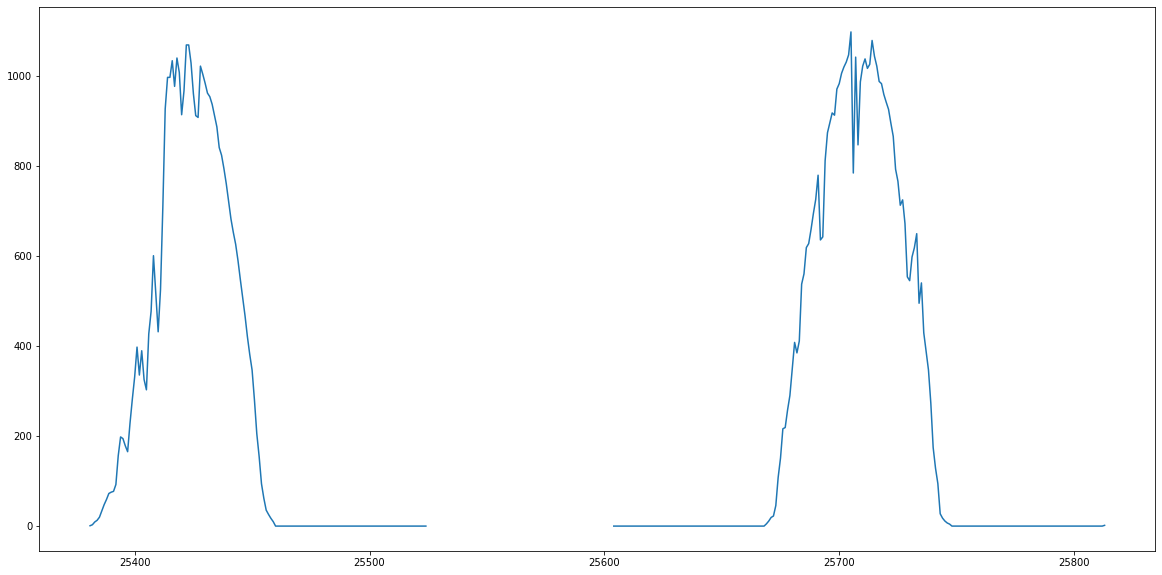

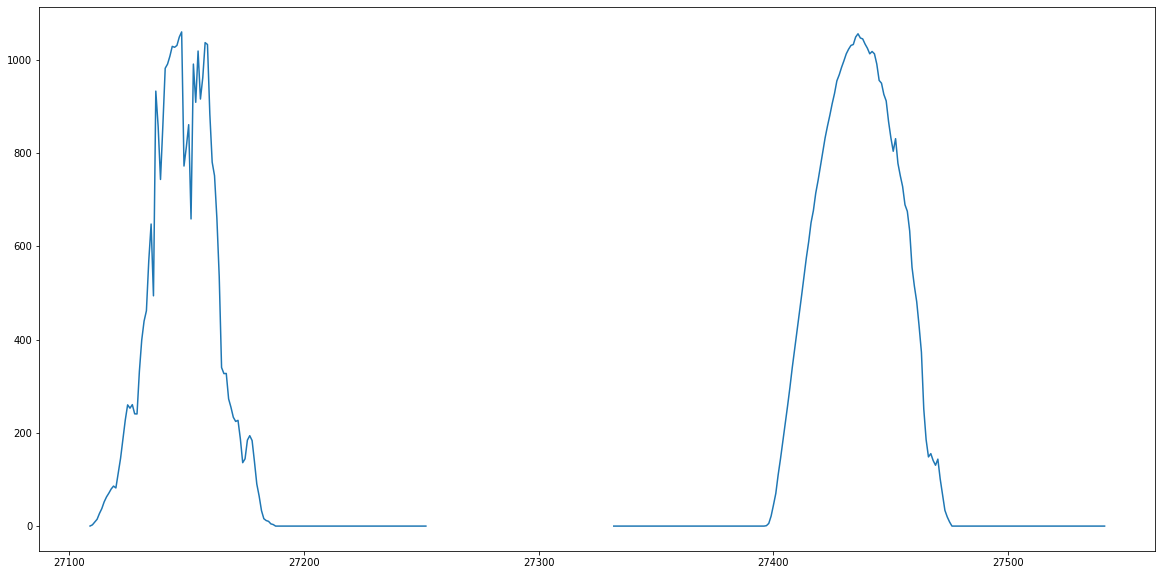

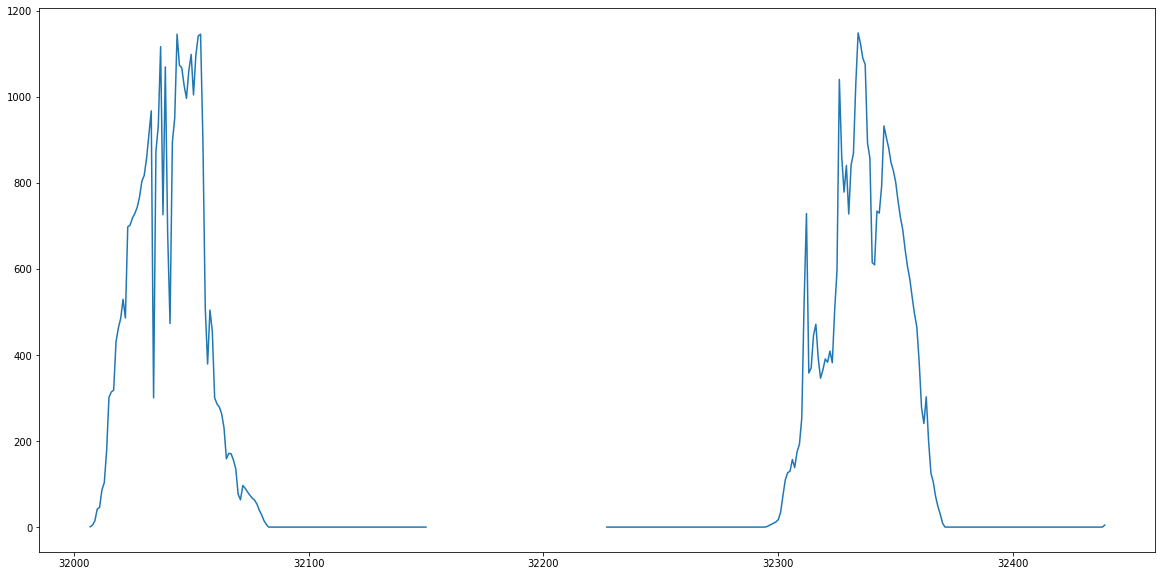

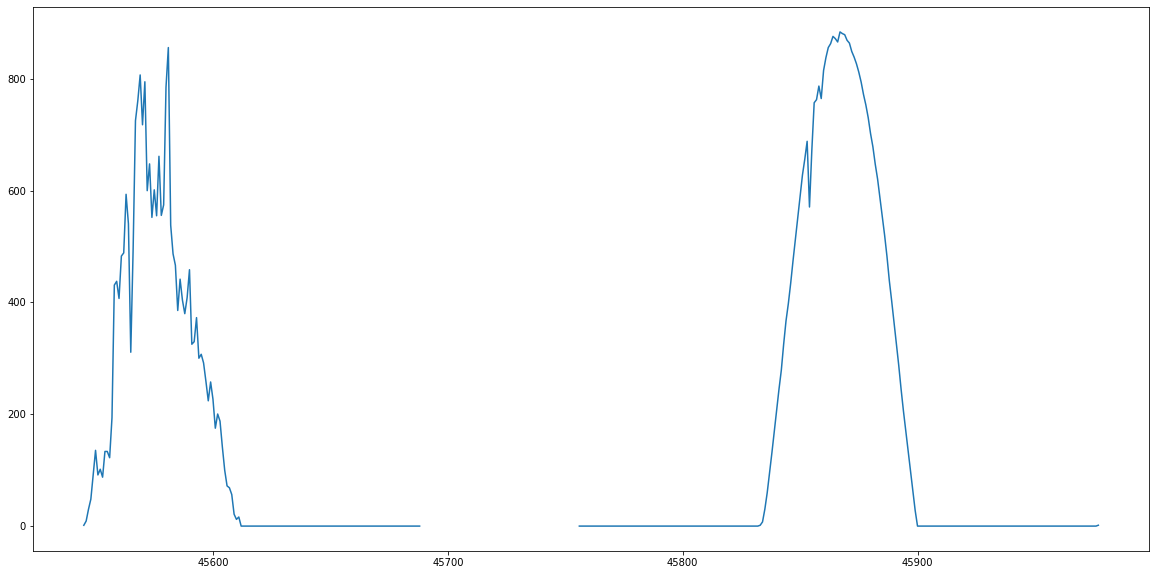

In [72]:
for istep in range(len(isteps)):
    fig, ax=plt.subplots(figsize=(20,10))
    ax.plot(tmx_inc['Ig'].loc[isteps[istep]-144:isteps[istep]+288])

# Imputo datos, con la lista de la ubicaci'on  de los vac'ios de datos

## Este es con el exporta mas sencillo 

In [73]:
nombres1=['time','Ib','Ig','to','RH','P','WS','WD','alturasolar','azimuth']
tmx_inc=imp.importa(path_archivo+nombre_archivo,nombres1)
in_size,out_size= 6,6 
model_name='../../03_CNN-LSTM_training/02_grid_training/01_models/train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5'
scalery=load(open('../../03_CNN-LSTM_training/02_grid_training/03_scalers/y_scalerv06.pkl','rb'))
scalerx=load(open('../../03_CNN-LSTM_training/02_grid_training/03_scalers/x_scalerv06.pkl','rb'))
inputs=['Ig','Ib','to','RH','azimuth','alturasolar']
outputs=['Ig']
training_step=1
season_size=144

model=load_model(model_name)
tmx_inc.to_csv(path_archivo2+nombre_archivo2) #Saving the incomplete data in the file that 
#will become the imputed data

for void in range(len(datavoids)):
    predi,targ=imp.Multioneshot(tmx_inc,datavoids[void],out_size,in_size,isteps[void]-144,
                                model,inputs,outputs,training_step,season_size,scalerx,scalery)
    imputed=imp.exporta(path_archivo2+nombre_archivo2,'Ig',predi,isteps[void],datavoids[void],
                                 nombres1,path_exported_file=path_archivo2+nombre_archivo2,save=True)
    
    

C:\Users\aguadarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\aguadarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\aguadarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\Local

In [74]:
imputed_csv=pd.read_csv(path_archivo2+nombre_archivo2,index_col=0,parse_dates=True)#,skiprows=1,names=['time','Ib','Ig','to','RH','P','WS','WD','alturasolar','azimuth'])
# imputed_csv[['Ib','Ig','to','RH','P','WS','WD','alturasolar','azimuth']].to_csv(path_archivo2+nombre_archivo2) #overwriting toepw file with only the needed columns
imputed_csv

,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
time,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817


### Importo tambien csv con datos completos 

In [75]:
comp=pd.read_csv('../../01_weather_data/03_imputing_process/01_test_data/base_temixco.csv',index_col=0,parse_dates=True)

In [76]:
dias=['2018-03-29',
'2018-01-30',
'2018-06-27',
'2018-06-15',
'2018-07-28',
'2018-08-12',
'2018-10-05',
'2018-11-14']

dias1=['2018-01-30',
'2018-03-08',
'2018-06-15',
'2018-06-27',
'2018-08-12',
'2018-07-09',
'2018-11-15']
dias2=[
'2018-11-15'] # el s 15 debe graficar esto 

In [77]:
idates

['2018-01-30 07:20:00',
 '2018-03-08 07:00:00',
 '2018-06-15 06:10:00',
 '2018-06-27 06:10:00',
 '2018-07-09 06:10:00',
 '2018-08-12 06:30:00',
 '2018-11-14 06:50:00']

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

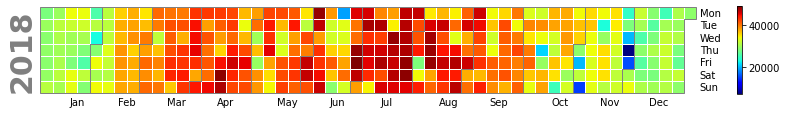

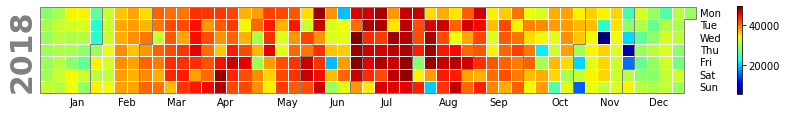

In [78]:
calplot.calplot(imputed_csv.Ig,cmap='jet')
calplot.calplot(comp.Ig,cmap='jet')

## Grafico los datos imputados contra los reales, de los dias que hac'ian falta

day_mae: 70.6691778528955


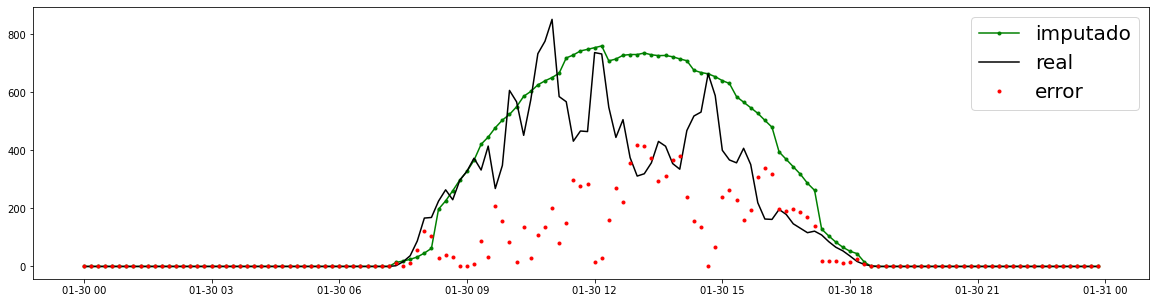

day_mae: 34.03222676605649


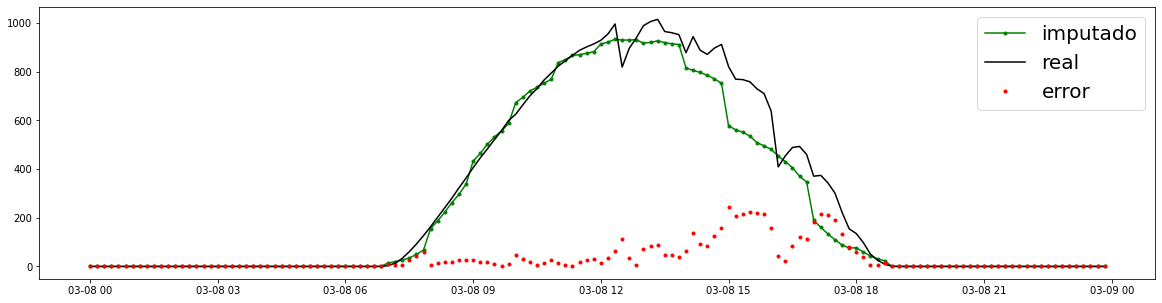

day_mae: 152.8260407630602


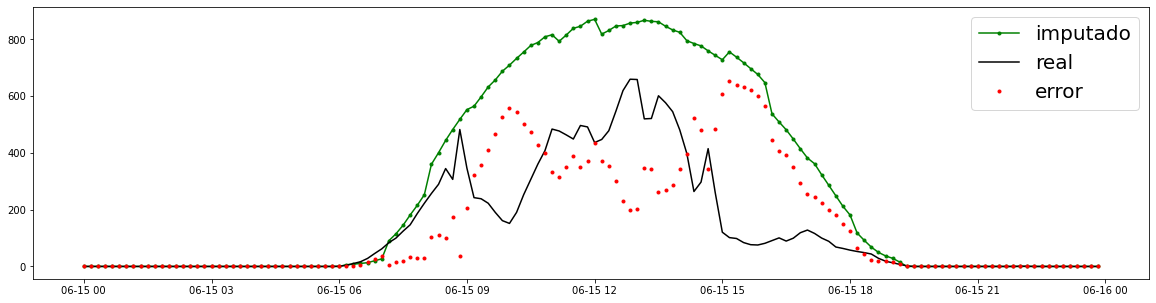

day_mae: 65.06392124168077


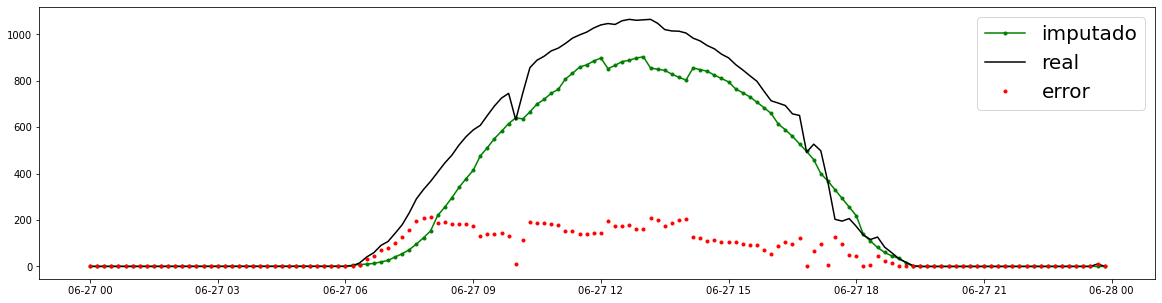

day_mae: 144.85271120410505


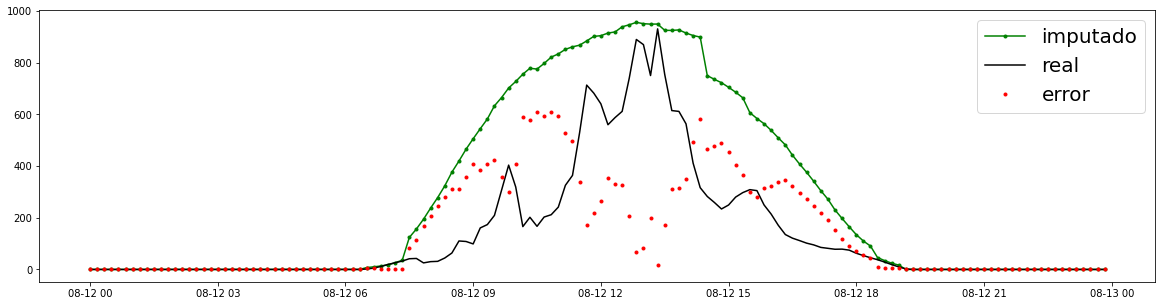

day_mae: 61.42680355490581


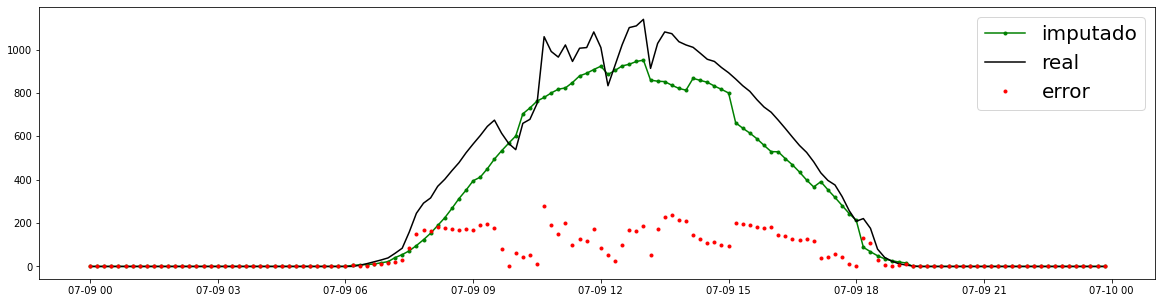

day_mae: 0.050041666666666665


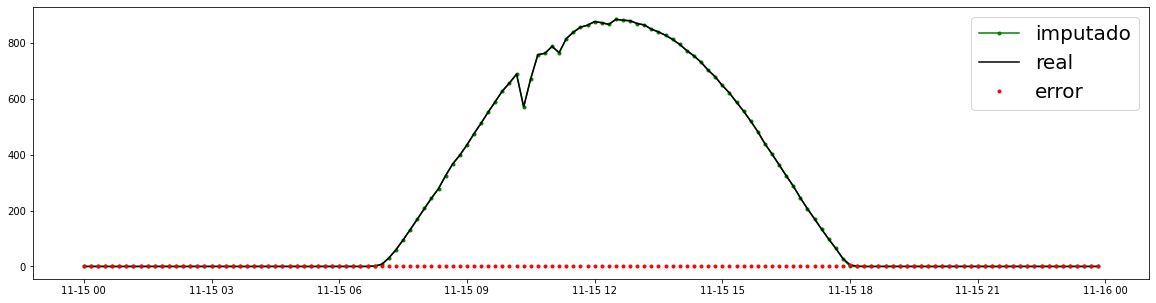

In [79]:
comp['me']=np.abs(comp.Ig-imputed_csv.Ig)
meyear=comp.me.resample('D').mean()
for dia in dias1:
    fig, ax=plt.subplots(figsize=(20,5))
    print('day_mae:',meyear[dia])
    plt.plot(imputed_csv.Ig[dia],'g.-',label='imputado')
    plt.plot(comp.Ig[dia],'k-',label='real')
    plt.plot(comp.me[dia],'r.',label='error')
    plt.legend(fontsize=20)
    plt.show()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 64)          448       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         98816     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0